# Arabic Handwritten Recognition
The automatic recognition of text on scanned images has enabled many applications such as searching for words in large volumes of documents, automatic sorting of postal mail, and convenient editing of previously printed documents. The domain of handwriting in the Arabic script presents unique technical challenges and has been addressed more recently than other domains. Many different methods have been proposed and applied to various types of images. Here we will focus on the recognition part of handwritten Arabic letters and digits recognition that face several challenges, including the unlimited variation in human handwriting and the large public databases.

In this project we built a model which can classify a new image to an arabic letter or digit and get accuracy of 98.86% when testing on more than 13000 different images.

In [1]:
# Import main libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import libraries needed for reading image and processing it
import csv
from PIL import Image
from scipy.ndimage import rotate


the datse set i download was in zip file so at first we need to un zipped the file 

In [2]:
#The zipped file name is dataset.zip
!unzip "Arabic Handwritten Characters Dataset CSV-20230115T042302Z-001.zip" -d "datasetcharacter"
!unzip "Arabic Handwritten Digits Dataset CSV-20230115T042309Z-001.zip" -d "datasetdigits"


'unzip' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


we need to extract all the files from the zip file to dataset character

In [3]:
import zipfile
with zipfile.ZipFile("Arabic Handwritten Characters Dataset CSV-20230115T042302Z-001.zip","r") as zip_ref:
    zip_ref.extractall("datasetcharacter")
    

In [4]:
import zipfile
with zipfile.ZipFile("Arabic Handwritten Digits Dataset CSV-20230115T042309Z-001.zip","r") as zip_ref:
    zip_ref.extractall("datasetdigits")
    

# Loading Arabic Letters Dataset

In [5]:
# Training letters images and labels files
letters_training_images_file_path = "datasetcharacter/Arabic Handwritten Characters Dataset CSV/training images.zip"
letters_training_labels_file_path = "datasetcharacter/Arabic Handwritten Characters Dataset CSV/training labels.zip"
# Testing letters images and labels files
letters_testing_images_file_path = "datasetcharacter/Arabic Handwritten Characters Dataset CSV/testing images.zip"
letters_testing_labels_file_path = "datasetcharacter/Arabic Handwritten Characters Dataset CSV/testing labels.zip"

# Loading dataset into dataframes
training_letters_images = pd.read_csv(letters_training_images_file_path, compression='zip', header=None)
training_letters_labels = pd.read_csv(letters_training_labels_file_path, compression='zip', header=None)
testing_letters_images = pd.read_csv(letters_testing_images_file_path, compression='zip', header=None)
testing_letters_labels = pd.read_csv(letters_testing_labels_file_path, compression='zip', header=None)

# print statistics about the dataset
print("There are %d training arabic letter images of 64x64 pixels." %training_letters_images.shape[0])
print("There are %d testing arabic letter images of 64x64 pixels." %testing_letters_images.shape[0])
training_letters_images.head()

There are 13440 training arabic letter images of 64x64 pixels.
There are 3360 testing arabic letter images of 64x64 pixels.


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# loading the arabic numbers  dataset

In [6]:
# Training digits images and labels files
digits_training_images_file_path = "datasetdigits/Arabic Handwritten Digits Dataset CSV/training images.zip"
digits_training_labels_file_path = "datasetdigits/Arabic Handwritten Digits Dataset CSV/training labels.zip"
# Testing digits images and labels files
digits_testing_images_file_path = "datasetdigits/Arabic Handwritten Digits Dataset CSV/testing images.zip"
digits_testing_labels_file_path = "datasetdigits/Arabic Handwritten Digits Dataset CSV/testing labels.zip"

# Loading dataset into dataframes
training_digits_images = pd.read_csv(digits_training_images_file_path, compression='zip', header=None)
training_digits_labels = pd.read_csv(digits_training_labels_file_path, compression='zip', header=None)
testing_digits_images = pd.read_csv(digits_testing_images_file_path, compression='zip', header=None)
testing_digits_labels = pd.read_csv(digits_testing_labels_file_path, compression='zip', header=None)

# print statistics about the dataset
print("There are %d training arabic digit images of 64x64 pixels." %training_digits_images.shape[0])
print("There are %d testing arabic digit images of 64x64 pixels." %testing_digits_images.shape[0])
     

There are 60000 training arabic digit images of 64x64 pixels.
There are 10000 testing arabic digit images of 64x64 pixels.


So, let’s visualize some images to understand the inputs we will deal with in this model which are Arabic characters and numbers as the figure below show that , but first we need to convert the csv input to image 

# Convert csv values to an image
Writting a method to be used later if we want visualization of an image from its pixels values.

In [7]:
def convert_values_to_image(image_values, display=False):
  image_array = np.asarray(image_values)
  image_array = image_array.reshape(64, 64).astype('uint8')
  # The original dataset is reflected so we will flip it then rotate for a better view only.
  image_array = np.flip(image_array, 0)
  image_array = rotate(image_array, -90)
  new_image = Image.fromarray(image_array)
  if display == True:
    new_image.show()
  return new_image

# Visualizing some examples

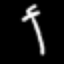

In [8]:
convert_values_to_image(training_letters_images.loc[0], True)

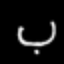

In [9]:
convert_values_to_image(training_letters_images.loc[12], True)
     


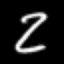

In [10]:
convert_values_to_image(training_letters_images.loc[40], True)
     


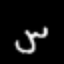

In [11]:
convert_values_to_image(training_letters_images.loc[3000], True)
     


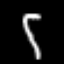

In [12]:

convert_values_to_image(training_digits_images.loc[2], True)

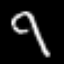

In [13]:

convert_values_to_image(training_digits_images.loc[9], True)

 # Data Preprocessing
# Image Normalization
We rescale the images by dividing every pixel in the image by 255 to make them into range [0, 1]

In [14]:
training_digits_images_scaled = training_digits_images.values.astype('float32')/255
training_digits_labels = training_digits_labels.values.astype('int32')
testing_digits_images_scaled = testing_digits_images.values.astype('float32')/255
testing_digits_labels = testing_digits_labels.values.astype('int32')

training_letters_images_scaled = training_letters_images.values.astype('float32')/255
training_letters_labels = training_letters_labels.values.astype('int32')
testing_letters_images_scaled = testing_letters_images.values.astype('float32')/255
testing_letters_labels = testing_letters_labels.values.astype('int32')
     

print("Training images of digits after scaling")
print(training_digits_images_scaled.shape)
training_digits_images_scaled[0:5]

Training images of digits after scaling
(60000, 4096)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Encoding Categorical Labels
From the labels csv files we can see that labels are categorical values and it is a multi-class classification problem.

Our outputs are in the form of:

Digits from 0 to 9 have categories numbers from 0 to 9
Letters from ’alef’ to ’yeh’ have categories numbers from 10 to 37
Here we will encode these categories values using One Hot Encoding with keras.

One-hot encoding transforms integer to a binary matrix where the array contains only one ‘1’ and the rest elements are ‘0’.

In [15]:
from keras.utils import to_categorical

# one hot encoding
# number of classes = 10 (digits classes) + 28 (arabic alphabet classes)
number_of_classes = 38
training_letters_labels_encoded = to_categorical(training_letters_labels, num_classes=number_of_classes)
testing_letters_labels_encoded = to_categorical(testing_letters_labels, num_classes=number_of_classes)
training_digits_labels_encoded = to_categorical(training_digits_labels, num_classes=number_of_classes)
testing_digits_labels_encoded = to_categorical(testing_digits_labels, num_classes=number_of_classes)

In [16]:
print(training_digits_labels_encoded)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Reshaping Input Images to 64x64x1
When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape (nb_samples,rows,columns,channels)

where nb_samples corresponds to the total number of images (or samples), and rows, columns, and channels correspond to the number of rows, columns, and channels for each image, respectively.

So we will reshape the input images to a 4D tensor with shape (nb_samples, 64, 64 ,1) as we use grayscale images of 64x64 pixels.

In [17]:
# reshape input digit images to 64x64x1
training_digits_images_scaled = training_digits_images_scaled.reshape([-1, 64, 64, 1])
testing_digits_images_scaled = testing_digits_images_scaled.reshape([-1, 64, 64, 1])

# reshape input letter images to 64x64x1
training_letters_images_scaled = training_letters_images_scaled.reshape([-1, 64, 64, 1])
testing_letters_images_scaled = testing_letters_images_scaled.reshape([-1, 64, 64, 1])

print(training_digits_images_scaled.shape, training_digits_labels_encoded.shape, testing_digits_images_scaled.shape, testing_digits_labels_encoded.shape)
print(training_letters_images_scaled.shape, training_letters_labels_encoded.shape, testing_letters_images_scaled.shape, testing_letters_labels_encoded.shape)
     

(60000, 64, 64, 1) (60000, 38) (10000, 64, 64, 1) (10000, 38)
(13440, 64, 64, 1) (13440, 38) (3360, 64, 64, 1) (3360, 38)


# merging the letters and numbers 
And now, after the dataset are ready we will merging the dataset merging the letters and numbers together the dataset combining together with 73440 for training and 13360 for testing with 38 classes which are 0-9 for numbers and 10-37 for letters as mentioned below.

In [18]:

training_data_images = np.concatenate((training_digits_images_scaled, training_letters_images_scaled), axis=0) 
training_data_labels = np.concatenate((training_digits_labels_encoded, training_letters_labels_encoded), axis=0)
print("Total Training images are {} images of shape".format(training_data_images.shape[0]))
print(training_data_images.shape, training_data_labels.shape)


testing_data_images = np.concatenate((testing_digits_images_scaled, testing_letters_images_scaled), axis=0) 
testing_data_labels = np.concatenate((testing_digits_labels_encoded, testing_letters_labels_encoded), axis=0)
print("Total Testing images are {} images of shape".format(testing_data_images.shape[0]))
print(testing_data_images.shape, testing_data_labels.shape)

Total Training images are 73440 images of shape
(73440, 64, 64, 1) (73440, 38)
Total Testing images are 13360 images of shape
(13360, 64, 64, 1) (13360, 38)


# Designing Model Architecture
Now we will make a method which creates the model architecture with the specified optimizer and activation functions.

In [19]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense

def create_model(optimizer='adam', kernel_initializer='he_normal', activation='relu'):
  # create model
  model = Sequential()
  model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(64, 64, 1), kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))
  model.add(GlobalAveragePooling2D())
  
  #Fully connected final layer
  model.add(Dense(38, activation='softmax'))

  # Compile model
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
  return model

Let’s understand above code step by step.

The first hidden layer is a convolutional layer. The layer has 16 feature maps, which with the size of 3×3 and an activation function which is relu. This is the input layer, expecting images with the structure outlined above.
The second layer is Batch Normalization which solves having distributions of the features vary across the training and test data, which breaks the IID assumption. We use it to help in two ways faster learning and higher overall accuracy.
The third layer is the MaxPooling layer. MaxPooling layer is used to down-sample the input to enable the model to make assumptions about the features so as to reduce overfitting. It also reduces the number of parameters to learn, reducing the training time.
The next layer is a Regularization layer using dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
Another hidden layer with 32 feature maps with the size of 3×3 and a relu activation function to capture more features from the image.
Other hidden layers with 64 and 128 feature maps with the size of 3×3 and a relu activation function to capture complex patterns from the image which will decribe the digits and letters later.
More MaxPooling, Batch Normalization, Regularization and GlobalAveragePooling2D layers.
The last layer is the output layer with 10 neurons (number of output classes) and it uses softmax activation function as we have multi-classes. Each neuron will give the probability of that class.
I used categorical_crossentropy as a loss function because its a multi-class classification problem. I used accuracy as metrics to improve the performance of our neural network.

# Model Summary And Visualization
Let's see the model summary.

In [20]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       1

# Parameters Tuning
We will tune the parameters optimizer, kernel_initializer and activation.

In [21]:

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# define the grid search parameters
optimizer = ['RMSprop', 'Adam', 'Adagrad', 'Nadam']
kernel_initializer = ['normal', 'uniform']
activation = ['relu', 'linear', 'tanh']

param_grid = dict(optimizer=optimizer, kernel_initializer=kernel_initializer, activation=activation)

# count number of different parameters values combinations
parameters_number = 1
for x in param_grid:
  parameters_number = parameters_number * len(param_grid[x]) 
print("Number of different parameter combinations = {}".format(parameters_number))

Number of different parameter combinations = 24


In [ ]:
epochs = 5
batch_size = 20 # 20 divides the training data samples

#creating the models with different hyperparameters
for a,b,c in [(x,y,z) for x in optimizer for z in activation for y in kernel_initializer]:
    params = {'optimizer' : a , 'kernel_initializer' : b , 'activation' : c}
    print(params)
    curr_model = create_model(a, b, c)
    curr_model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1)
    print("=============================================================================")

{'optimizer': 'RMSprop', 'kernel_initializer': 'normal', 'activation': 'relu'}
Epoch 1/5
3672/3672 [==============================] - 310s 84ms/step - loss: 0.3394 - accuracy: 0.9060 - val_loss: 5.2711 - val_accuracy: 0.1708
Epoch 2/5
3672/3672 [==============================] - 310s 85ms/step - loss: 0.1156 - accuracy: 0.9642 - val_loss: 0.1317 - val_accuracy: 0.9588
Epoch 3/5
 959/3672 [======>.......................] - ETA: 3:34 - loss: 0.0969 - accuracy: 0.9703

From the above results we can see that best parameters are:

Optimizer: Adam
Kernel_initializer: uniform
Activation: relu
Let's create the model with the best parameters obtained.

In [ ]:
model = create_model(optimizer='Adam', kernel_initializer='uniform', activation='relu')
     

# Training the Model
# Fitting the Model
Train the model using batch_size=20 to reduce used memory and make the training more quick. We will train the model first on 10 epochs to see the accuracy that we will obtain.

Model Evaluation and Validation
We will Train the model using batch_size=20 to reduce used memory and make the
training more quick. We will train the model first on 10 epochs to see the accuracy
that we will obtain then we will increase number of epochs to be trained on to
improve the accuracy.


In [ ]:
from keras.callbacks import ModelCheckpoint  

# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=10, batch_size=20, verbose=1, callbacks=[checkpointer])

# Plotting Loss and Accuracy Curves with Epochs

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
  # Loss Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['loss'],'r',linewidth=3.0)
  plt.plot(history.history['val_loss'],'b',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)

  # Accuracy Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['acc'],'r',linewidth=3.0)
  plt.plot(history.history['val_acc'],'b',linewidth=3.0)
  plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16) 
     

plot_loss_accuracy(history)
     


# Load the Model with the Best Validation Loss

In [ ]:
model.load_weights('weights.hdf5')

# Test the Model



In [ ]:
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

# now lets train the model by increasing the number of epochs and after that check the overviting using plot 

In [ ]:
Training More on the best model

epochs = 20
batch_size = 20

checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)

history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])
          
model.load_weights('weights.hdf5')
plot_loss_accuracy(history)

# A Demo to see how the model works on examples of the testing data
Let's recall:

Digits from 0 to 9 were encoded to categorical labels from 0 to 9
Letters from ’alef’='أ' to ’yeh’='ى' were encoded to categorical labels from 10 to 37


In [ ]:
def get_predicted_classes(model, data, labels=None):
  image_predictions = model.predict(data)
  predicted_classes = np.argmax(image_predictions, axis=1)
  true_classes = np.argmax(labels, axis=1)
  return predicted_classes, true_classes

def get_non_zero_index_from_one_hot_encoding(one_hot_encoding):
  non_zero_index = np.where(one_hot_encoding == 1)[0]
  assert(len(non_zero_index) == 1)
  non_zero_index = non_zero_index[0]
  return non_zero_index
     

def convert_categorical_label_to_real_label(categorical_label):
  real_labels = []
  real_labels.extend([x for x in range(10)])
  real_labels.extend(['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ى'])
  return real_labels[categorical_label]
     

def show_example(sample_index):
  y_pred, y_true = get_predicted_classes(model, testing_data_images[[sample_index]], testing_data_labels[[sample_index]])
  non_zero_index = get_non_zero_index_from_one_hot_encoding(testing_data_labels[sample_index])
  y_true = y_true[0]
  y_pred = y_pred[0]
  assert y_true == non_zero_index
  true_label = convert_categorical_label_to_real_label(y_true)
  predicted_label = convert_categorical_label_to_real_label(y_pred)
  print("The following image has the written character '{}' but the model predicted it as '{}'".format(true_label, predicted_label))
  return true_label == predicted_label
     




In [ ]:
sample_index = 5
show_example(sample_index)
convert_values_to_image(testing_digits_images.loc[sample_index], True)
     


In [ ]:
sample_index = 11414
show_example(sample_index)
convert_values_to_image(testing_letters_images.loc[sample_index - testing_digits_images.shape[0]], True)